# Time series forecasting using VARMA by Piotr Łata

Dataset : https://www.kaggle.com/kyanyoga/sample-sales-data

Trochę więcej informacji o VARMA : https://homepage.univie.ac.at/robert.kunst/var11_iqbal_naveed_nadeem.pdf

Zanim przystąpimy do jakichkolwiek działań, warto byłoby przyjżeć się danym, z datasetu wytypowałem 4 potrzebne mi kolumny :

1. QUANTIFYORDERED - Ilość zamówionych egzemplarzy.
2. PRICEEACH - Cena za sztukę.
3. ORDERDATE - Data wykonania zamówienia.
4. PRODUCTCODE - Unikalny kod produktu.

Zatem wyprowadźmy teraz te dane, oraz zaprezentujmy je na wykresach

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def parser(x):
    return pd.datetime.strptime(x, '%m/%d/%Y %H:%M')

In [3]:
data = pd.read_csv('sales_data_sample.csv', usecols=['QUANTITYORDERED','PRICEEACH','ORDERDATE','PRODUCTCODE'], parse_dates=[2], date_parser=parser)

In [4]:
print("Products List:")
products = data['PRODUCTCODE'].drop_duplicates().values.tolist()
for i in range(0,len(products),5):
    if not i + 5 >= len(products):
        for x in range(5):
            print(products[i+x], end=" ")
        print("")
    else:
        for x in range(i-len(products)):
            print(products[i+x], end=" ")
        print("")

Products List:
S10_1678 S10_1949 S10_2016 S10_4698 S10_4757 
S10_4962 S12_1099 S12_1108 S12_1666 S12_2823 
S12_3148 S12_3380 S12_3891 S12_3990 S12_4473 
S12_4675 S18_1097 S18_1129 S18_1342 S18_1367 
S18_1589 S18_1662 S18_1749 S18_1889 S18_1984 
S18_2238 S18_2248 S18_2319 S18_2325 S18_2432 
S18_2581 S18_2625 S18_2795 S18_2870 S18_2949 
S18_2957 S18_3029 S18_3136 S18_3140 S18_3232 
S18_3259 S18_3278 S18_3320 S18_3482 S18_3685 
S18_3782 S18_3856 S18_4027 S18_4409 S18_4522 
S18_4600 S18_4668 S18_4721 S18_4933 S24_1046 
S24_1444 S24_1578 S24_1628 S24_1785 S24_1937 
S24_2000 S24_2011 S24_2022 S24_2300 S24_2360 
S24_2766 S24_2840 S24_2841 S24_2887 S24_2972 
S24_3151 S24_3191 S24_3371 S24_3420 S24_3432 
S24_3816 S24_3856 S24_3949 S24_3969 S24_4048 
S24_4258 S24_4278 S24_4620 S32_1268 S32_1374 
S32_2206 S32_2509 S32_3207 S32_3522 S32_4289 
S32_4485 S50_1341 S50_1392 S50_1514 S50_4713 
S700_1138 S700_1691 S700_1938 S700_2047 S700_2466 
S700_2610 S700_2824 S700_2834 S700_3167 S700_3505 



In [5]:
item = data.loc[data['PRODUCTCODE'] == 'S10_1678']
start = np.datetime64(item.iloc[0]['ORDERDATE'],'Y')
end = np.datetime64(item.iloc[len(item)-1]['ORDERDATE'],'Y')
ticks = np.arange(start,end+1,dtype='datetime64[Y]')

c:\users\persky\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


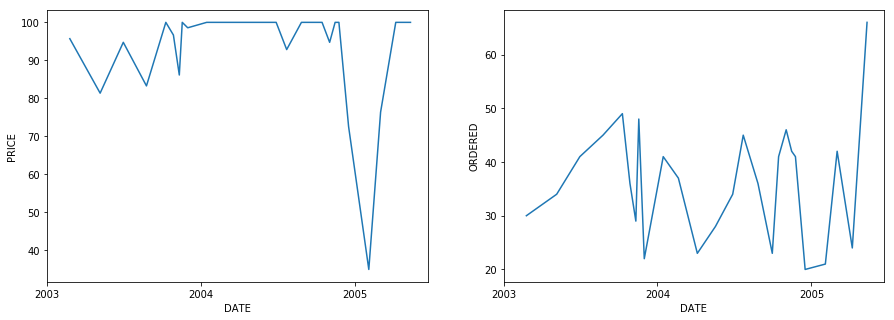

In [6]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(item['ORDERDATE'],item['PRICEEACH'])
plt.xticks(ticks)
plt.xlabel('DATE')
plt.ylabel('PRICE')
plt.subplot(1,2,2)
plt.plot(item['ORDERDATE'],item['QUANTITYORDERED'])
plt.xticks(ticks)
plt.xlabel('DATE')
plt.ylabel('ORDERED')
plt.show()

Jak widać cena oraz ilość kupionych przedmiotów jest zmienna po czasie, do przewidywania takich serii danych możemy użyć modelu VARMA który korzysta z wektorów do przewidywania kolejnych wartości funkcji.

# Tworzenie wektora

In [7]:
from statsmodels.tsa.statespace.varmax import VARMAX

In [8]:
item_vset = item[['QUANTITYORDERED','PRICEEACH']]
item_vtrain = item_vset

# Budowa modelu

In [9]:
model = VARMAX(item_vtrain.values,order=(1,1))
model_fit = model.fit(maxiter=10000,disp=False)
print(model_fit.summary())

c:\users\persky\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
c:\users\persky\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


                           Statespace Model Results                           
Dep. Variable:           ['y1', 'y2']   No. Observations:                   26
Model:                     VARMA(1,1)   Log Likelihood                -194.755
                          + intercept   AIC                            415.510
Date:                Thu, 27 Jun 2019   BIC                            431.866
Time:                        19:53:14   HQIC                           420.220
Sample:                             0                                         
                                 - 26                                         
Covariance Type:                  opg                                         
Ljung-Box (Q):                28.65, 18.92   Jarque-Bera (JB):          0.99, 15.86
Prob(Q):                        0.28, 0.80   Prob(JB):                   0.61, 0.00
Heteroskedasticity (H):         1.81, 3.58   Skew:                     -0.48, -1.49
Prob(H) (two-sided):            0.39,

# Predykcja

In [10]:
yhat = model_fit.forecast(steps=8)
print("ORDERQUANTITY :")
for i in range(len(yhat)):
    print("Real : {} | Predicted : {}".format(item_vset[18:].values[i][0],yhat[i][0]))
print("PRICEORDER :")
for i in range(len(yhat)):
    print("Real : {} | Predicted : {}".format(item_vset[18:].values[i][1],yhat[i][1]))

ORDERQUANTITY :
Real : 46.0 | Predicted : 42.56958533601398
Real : 42.0 | Predicted : 35.360477235778085
Real : 41.0 | Predicted : 32.406559906214476
Real : 20.0 | Predicted : 32.76063962933185
Real : 21.0 | Predicted : 34.469281132776004
Real : 42.0 | Predicted : 36.01456559033549
Real : 24.0 | Predicted : 36.77533954264516
Real : 66.0 | Predicted : 36.82696671858312
PRICEORDER :
Real : 94.74 | Predicted : 111.54545320683081
Real : 100.0 | Predicted : 101.69253616435662
Real : 100.0 | Predicted : 93.24144318571854
Real : 72.55 | Predicted : 89.3139868701
Real : 34.91 | Predicted : 89.26469154550512
Real : 76.36 | Predicted : 91.01668209568146
Real : 100.0 | Predicted : 92.79029192290943
Real : 100.0 | Predicted : 93.75938106589811


c:\users\persky\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


Jak się okazuje model nie jest w stanie wykonać predykcji dla danych testowych, powodem tego jest nagły skok wartości PRICEEACH w 21 wierszu. Aby temu zapobiec musimy wyciąć tę część danych.

In [11]:
def retIndex(dset,colname,err):
    vsum = []
    for index,item in enumerate(dset[colname].values):
        if index <= 4:
            vsum.append(item)
        else:
            if item > err * sum(vsum)/len(vsum):
                return index
    return len(dset)-1

In [12]:
index = retIndex(item_vset,'PRICEEACH',1.6)
temp = item_vset[:index]
index = retIndex(temp,'QUANTITYORDERED',1.6)
vectors = temp[:index]
items = item[:index]
train_size = (int)(index * 0.6)
steps = index - train_size
print(train_size)

14


Teraz kiedy nasz dataset jest w miare opytmalny i nie posiada wartości które mogłyby popsuć predykcje możemy utworzyć nowy model

Jednak zanim do tego przystąpimy, powinniśmy utworzyć set treningowy

In [13]:
vector_train = vectors[:train_size]
items = items[:index]
print(vector_train)

    QUANTITYORDERED  PRICEEACH
0                30      95.70
1                34      81.35
2                41      94.74
3                45      83.26
4                49     100.00
5                36      96.66
6                29      86.13
7                48     100.00
8                22      98.57
9                41     100.00
10               37     100.00
11               23     100.00
12               28     100.00
13               34     100.00


Nasza lista wektorów została utworzona a zatem możemy przejść do budowy modelu

In [14]:
model = VARMAX(vector_train.values,order=(1,1))
model_fit = model.fit(maxiter=100000,disp=False)
print(model_fit.summary())

c:\users\persky\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


                           Statespace Model Results                           
Dep. Variable:           ['y1', 'y2']   No. Observations:                   14
Model:                     VARMA(1,1)   Log Likelihood                 -86.927
                          + intercept   AIC                            199.855
Date:                Thu, 27 Jun 2019   BIC                            208.163
Time:                        19:53:24   HQIC                           199.086
Sample:                             0                                         
                                 - 14                                         
Covariance Type:                  opg                                         
Ljung-Box (Q):                  7.29, 9.35   Jarque-Bera (JB):           0.41, 3.52
Prob(Q):                        0.89, 0.75   Prob(JB):                   0.81, 0.17
Heteroskedasticity (H):         1.23, 0.22   Skew:                     -0.31, -1.23
Prob(H) (two-sided):            0.83,

# Czas na kolejną predykcję

In [15]:
yhat = model_fit.forecast(steps=steps)
print("ORDERQUANTITY :")
for i in range(len(yhat)):
    print("Real : {} | Predicted : {}".format(vectors[train_size:].values[i][0],yhat[i][0]))
print("PRICEORDER :")
for i in range(len(yhat)):
    print("Real : {} | Predicted : {}".format(vectors[train_size:].values[i][1],yhat[i][1]))

ORDERQUANTITY :
Real : 45.0 | Predicted : 29.038466876805884
Real : 36.0 | Predicted : 32.49891175590807
Real : 23.0 | Predicted : 33.23048841925876
Real : 41.0 | Predicted : 33.96977856392765
Real : 46.0 | Predicted : 34.2843214774101
Real : 42.0 | Predicted : 34.48509887466825
Real : 41.0 | Predicted : 34.58864512009728
Real : 20.0 | Predicted : 34.64807790752485
Real : 21.0 | Predicted : 34.6803615319899
Real : 42.0 | Predicted : 34.69839633519962
PRICEORDER :
Real : 92.83 | Predicted : 97.10296749945525
Real : 100.0 | Predicted : 96.99898834097141
Real : 100.0 | Predicted : 96.38418040479712
Real : 100.0 | Predicted : 96.20149824129082
Real : 94.74 | Predicted : 96.0558842072332
Real : 100.0 | Predicted : 95.98789472920875
Real : 100.0 | Predicted : 95.94671492962969
Real : 72.55 | Predicted : 95.92493368731346
Real : 34.91 | Predicted : 95.91259674033178
Real : 76.36 | Predicted : 95.90585042697059


c:\users\persky\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


Wygląda to już trochę lepiej a zatem wyprowadźmy wykresy i zobaczmy jak wyglądają nasze predykcje

In [16]:
price = vectors[:train_size]['PRICEEACH'].values.tolist() + [None for i in range(steps)]
order = vectors[:train_size]['QUANTITYORDERED'].values.tolist() + [None for i in range(steps)]
pred_price = [None for i in range(train_size-1)] + [price[-steps-1]]
pred_order = [None for i in range(train_size-1)] + [order[-steps-1]]
result = yhat.tolist()
for i in range(len(result)):
    pred_price.append(result[i][1])
    pred_order.append(result[i][0])

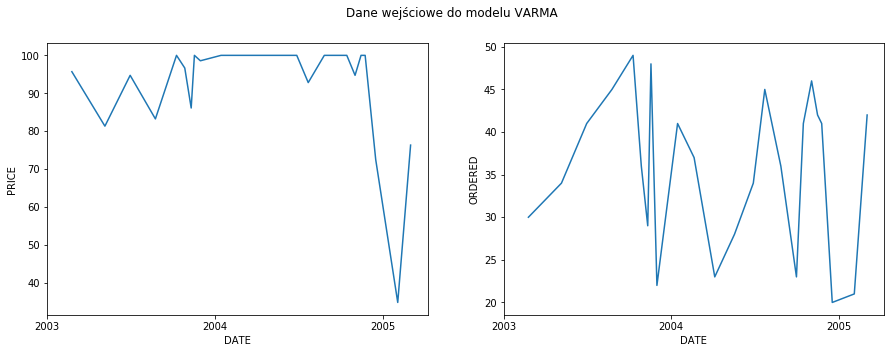

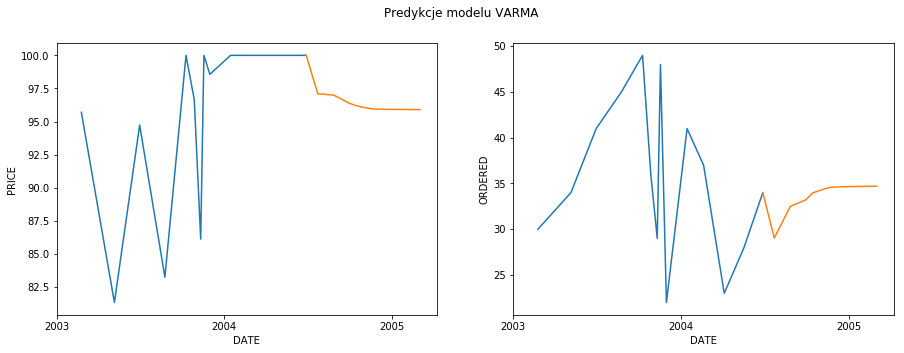

In [17]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.suptitle("Dane wejściowe do modelu VARMA")
plt.plot(items['ORDERDATE'],items['PRICEEACH'])
plt.xticks(ticks)
plt.xlabel('DATE')
plt.ylabel('PRICE')
plt.subplot(1,2,2)
plt.plot(items['ORDERDATE'],items['QUANTITYORDERED'])
plt.xticks(ticks)
plt.xlabel('DATE')
plt.ylabel('ORDERED')

plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.suptitle("Predykcje modelu VARMA")
plt.plot(items['ORDERDATE'],price)
plt.plot(items['ORDERDATE'],pred_price)
plt.xticks(ticks)
plt.xlabel('DATE')
plt.ylabel('PRICE')
plt.subplot(1,2,2)
plt.plot(items['ORDERDATE'],order)
plt.plot(items['ORDERDATE'],pred_order)
plt.xticks(ticks)
plt.xlabel('DATE')
plt.ylabel('ORDERED')

plt.show()

# Ze względu na niewielką ilość danych wyniki nie będą aż tak dokładne :)